In [1]:
import pickle
import numpy as np

In [2]:
with open("train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [3]:
with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

In [4]:
type(test_data)

list

In [5]:
type(train_data)

list

In [6]:
len(test_data)

1000

In [7]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [8]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [9]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [10]:
train_data[0][2]

'no'

In [11]:
vocab = set()

In [12]:
all_data = test_data + train_data

In [13]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [14]:
vocab.add('no')
vocab.add('yes')

In [15]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [16]:
vocab_len = len(vocab) + 1

In [17]:
max_story_len = max([len(data[0]) for data in all_data])

In [18]:
max_story_len

156

In [19]:
max_question_len = max([len(data[1]) for data in all_data])

In [20]:
max_question_len

6

In [21]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [22]:
vocab_size = len(vocab) + 1

In [23]:
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [24]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [25]:
tokenizer.word_index

{'bedroom': 1,
 'office': 2,
 'back': 3,
 'the': 4,
 'got': 5,
 'travelled': 6,
 'left': 7,
 'in': 8,
 '?': 9,
 'moved': 10,
 'discarded': 11,
 'garden': 12,
 'there': 13,
 'down': 14,
 'apple': 15,
 'kitchen': 16,
 'put': 17,
 '.': 18,
 'no': 19,
 'journeyed': 20,
 'hallway': 21,
 'mary': 22,
 'daniel': 23,
 'went': 24,
 'john': 25,
 'sandra': 26,
 'dropped': 27,
 'milk': 28,
 'picked': 29,
 'to': 30,
 'took': 31,
 'up': 32,
 'grabbed': 33,
 'yes': 34,
 'is': 35,
 'bathroom': 36,
 'football': 37}

In [26]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [27]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [28]:
len(train_story_text)

10000

In [29]:
len(train_story_seq)

10000

In [30]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    for story, query, answer in data: 
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [31]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [32]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [33]:
inputs_test

array([[ 0,  0,  0, ...,  4,  1, 18],
       [ 0,  0,  0, ...,  4, 12, 18],
       [ 0,  0,  0, ...,  4, 12, 18],
       ...,
       [ 0,  0,  0, ...,  4, 15, 18],
       [ 0,  0,  0, ...,  4, 12, 18],
       [ 0,  0,  0, ..., 15, 13, 18]])

In [34]:
queries_test

array([[35, 25,  8,  4, 16,  9],
       [35, 25,  8,  4, 16,  9],
       [35, 25,  8,  4, 12,  9],
       ...,
       [35, 22,  8,  4,  1,  9],
       [35, 26,  8,  4, 12,  9],
       [35, 22,  8,  4, 12,  9]])

In [35]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 497.,   0.,   0.,   0.])

In [37]:
tokenizer.word_index['yes']

34

In [38]:
tokenizer.word_index['no']

19

In [39]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [40]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [41]:

input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))


In [42]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))


In [43]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [44]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [45]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [46]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [47]:
answer = concatenate([response, question_encoded])

In [48]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [49]:
answer = LSTM(32)(answer)

In [50]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [51]:
answer = Activation('softmax')(answer)

In [52]:
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [54]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 8s 16ms/step - loss: 0.8768 - accuracy: 0.4875 - val_loss: 0.7026 - val_accuracy: 0.5030
Epoch 2/120
313/313 [==============================] - 4s 13ms/step - loss: 0.7032 - accuracy: 0.5004 - val_loss: 0.6958 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 4s 13ms/step - loss: 0.6978 - accuracy: 0.5011 - val_loss: 0.6986 - val_accuracy: 0.4970
Epoch 4/120
313/313 [==============================] - 4s 13ms/step - loss: 0.6960 - accuracy: 0.5011 - val_loss: 0.6947 - val_accuracy: 0.4970
Epoch 5/120
313/313 [==============================] - 4s 13ms/step - loss: 0.6956 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5120
Epoch 6/120
313/313 [==============================] - 4s 13ms/step - loss: 0.6954 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 7/120
313/313 [==============================] - 4s 13ms/step - loss: 0.6958 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy:

313/313 [==============================] - 4s 14ms/step - loss: 0.6952 - accuracy: 0.4896 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 58/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6946 - accuracy: 0.5086 - val_loss: 0.6945 - val_accuracy: 0.5030
Epoch 59/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6943 - accuracy: 0.5021 - val_loss: 0.6940 - val_accuracy: 0.4970
Epoch 60/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6947 - accuracy: 0.4973 - val_loss: 0.6964 - val_accuracy: 0.4970
Epoch 61/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6945 - accuracy: 0.5073 - val_loss: 0.6944 - val_accuracy: 0.4970
Epoch 62/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6945 - accuracy: 0.5105 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 63/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6950 - accuracy: 0.4966 - val_loss: 0.6930 - val_accuracy: 0.506

313/313 [==============================] - 4s 14ms/step - loss: 0.3339 - accuracy: 0.8577 - val_loss: 0.3979 - val_accuracy: 0.8280
Epoch 114/120
313/313 [==============================] - 4s 14ms/step - loss: 0.3299 - accuracy: 0.8595 - val_loss: 0.4070 - val_accuracy: 0.8210
Epoch 115/120
313/313 [==============================] - 4s 14ms/step - loss: 0.3319 - accuracy: 0.8610 - val_loss: 0.4010 - val_accuracy: 0.8170
Epoch 116/120
313/313 [==============================] - 4s 14ms/step - loss: 0.3318 - accuracy: 0.8628 - val_loss: 0.4032 - val_accuracy: 0.8200
Epoch 117/120
313/313 [==============================] - 4s 14ms/step - loss: 0.3289 - accuracy: 0.8627 - val_loss: 0.3952 - val_accuracy: 0.8210
Epoch 118/120
313/313 [==============================] - 4s 14ms/step - loss: 0.3278 - accuracy: 0.8634 - val_loss: 0.4032 - val_accuracy: 0.8220
Epoch 119/120
313/313 [==============================] - 4s 14ms/step - loss: 0.3249 - accuracy: 0.8659 - val_loss: 0.4023 - val_accuracy:

In [55]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


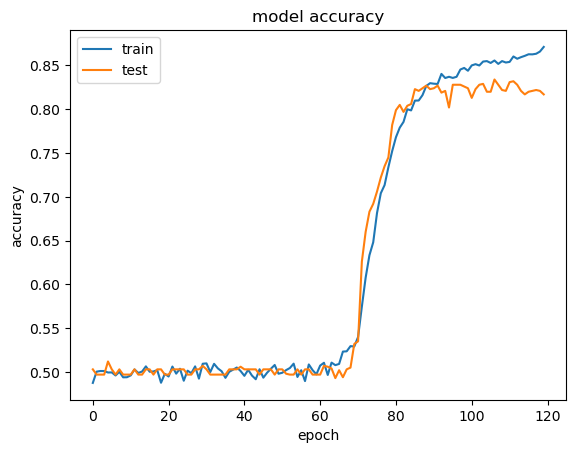

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [99]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 0s 5ms/step


In [100]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [101]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [102]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [103]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [104]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.992161


In [105]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [106]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [107]:
my_question = "Is the football in the garden ?"

In [108]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [109]:
mydata = [(my_story.split(),my_question.split(),'?')]

In [110]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [111]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 31ms/step


In [112]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9848247
